# Modelos Bagging y Boosting

En esta emocionante prueba final de Data Science, nos adentraremos en un desafiante problema del mundo real relacionado con la industria de la aviación. Nuestro objetivo es desarrollar un modelo predictivo capaz de estimar el precio de un boleto de avión basándonos en diversas características del vuelo. Este problema representa un escenario común en la industria de viajes, donde las aerolíneas y las agencias de viajes buscan ofrecer a los pasajeros tarifas competitivas y precisas. Imagina que trabajas en una agencia de viajes en línea que desea ofrecer a los clientes una herramienta que les permita obtener estimaciones precisas del precio de los boletos de avión para su próximo viaje. Sin embargo, el precio de un boleto de avión puede variar significativamente según múltiples factores, como la aerolínea, el destino, la temporada, la clase de servicio y la anticipación de la reserva. Aquí es donde entra en juego el Data Science. El desafío radica en desarrollar un modelo de Machine Learning que pueda predecir el precio de un boleto de avión en función de estas diversas variables. Esto implica limpiar, explorar y transformar los datos, seleccionar características relevantes, entrenar y afinar modelos predictivos y evaluar su rendimiento de manera precisa. Esta prueba final de Data Science te desafiará a aplicar todos los conocimientos adquiridos durante el curso para abordar un problema del mundo real. Al final de este desafío, habrás desarrollado un modelo de Machine Learning capaz de estimar con precisión el precio de un boleto de avión, lo que puede tener un impacto significativo en la industria de viajes y mejorar la experiencia de los viajeros.


In [3]:
# Bibliotecas Comunes
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#Metricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Identificación de outliers
from sklearn.ensemble import IsolationForest

# Evaluacion de Modelos y Seleccion de Features
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import SequentialFeatureSelector

# Guardar modelos entrenados
from joblib import dump



### Actividad 1

Describe con detenimiento el problema de negocio que se desea resolver, y cómo se va a hacer esto. Indica la metodología, tareas a realizar, variable objetivo a predecir, etc.

In [46]:
# La Metodologia a ocupar es CRISP-DM
# Etapas:
# Comprensión del Negocio: El negocio está relacionado con aerolineas y todos los antecedentes relevantes que se han obtenido 
# a través de datasets y que permitirán predecir una variable objetivo (price)
# Comprensión de los Datos : Entender el tipo de datos, otuliers, datos nulos
# Preparación de los Datos: Limpieza de datos, transformaciones de datos, tratamientos de valores nulos, seleccion de variables,
# transformación escalar y codificar datos, dividir datos entre entrenamiento y testeo.
# Modelado: selección de algoritmos, seleccion de hiperparametros, validación cruzada
# Evaluación: Cálculo de métricas y conclusiones

### Actividad 2

Carga los dataset entregados y genera un reporte de calidad de los mismos. Indica qué estrategias se van a utilizar para aquellos puntos encontrados (Indicar nulos, outliers, valores perdidos, que se hará con esto, etc.)

### Actividad 3

Realiza las transformaciones necesarias para realizar el modelamiento posterior y crea las variables que estimes convenientes con ayuda del análisis previo y la expertise del negocio.

In [4]:
df_1 = pd.read_excel("business.xlsx", sheet_name="business.csv")
df_1

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690
...,...,...,...,...,...,...,...,...,...,...,...
93482,2022-03-31,Vistara,UK,822,09:45:00,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50:00,Hyderabad,69265
93483,2022-03-31,Vistara,UK,826,12:30:00,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55:00,Hyderabad,77105
93484,2022-03-31,Vistara,UK,832,07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,79099
93485,2022-03-31,Vistara,UK,828,07:00:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00:00,Hyderabad,81585


In [6]:
df_2 = pd.read_excel("economy.xlsx", sheet_name="economy.csv")
df_2

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955
...,...,...,...,...,...,...,...,...,...,...,...
206769,2022-03-31,Vistara,UK,832,07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,7697
206770,2022-03-31,Vistara,UK,832,07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,7709
206771,2022-03-31,Vistara,UK,826,12:30:00,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05:00,Hyderabad,8640
206772,2022-03-31,Vistara,UK,822,09:45:00,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05:00,Hyderabad,8640


In [8]:
df_1["economy"] = 0
df_1

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,economy
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612,0
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612,0
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220,0
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450,0
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,2022-03-31,Vistara,UK,822,09:45:00,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50:00,Hyderabad,69265,0
93483,2022-03-31,Vistara,UK,826,12:30:00,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55:00,Hyderabad,77105,0
93484,2022-03-31,Vistara,UK,832,07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,79099,0
93485,2022-03-31,Vistara,UK,828,07:00:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00:00,Hyderabad,81585,0


In [9]:
df_2["economy"] = 1
df_2

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,economy
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953,1
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953,1
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956,1
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955,1
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955,1
...,...,...,...,...,...,...,...,...,...,...,...,...
206769,2022-03-31,Vistara,UK,832,07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,7697,1
206770,2022-03-31,Vistara,UK,832,07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,7709,1
206771,2022-03-31,Vistara,UK,826,12:30:00,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05:00,Hyderabad,8640,1
206772,2022-03-31,Vistara,UK,822,09:45:00,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05:00,Hyderabad,8640,1


In [10]:
df = pd.concat([df_1, df_2], axis=0, ignore_index=True)
df

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,economy
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612,0
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612,0
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220,0
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450,0
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690,0
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,UK,832,07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,7697,1
300257,2022-03-31,Vistara,UK,832,07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,7709,1
300258,2022-03-31,Vistara,UK,826,12:30:00,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05:00,Hyderabad,8640,1
300259,2022-03-31,Vistara,UK,822,09:45:00,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05:00,Hyderabad,8640,1


In [11]:
# Tipos de Datos y No Nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        300261 non-null  datetime64[ns]
 1   airline     300261 non-null  object        
 2   ch_code     300261 non-null  object        
 3   num_code    300261 non-null  int64         
 4   dep_time    300261 non-null  object        
 5   from        300261 non-null  object        
 6   time_taken  300261 non-null  object        
 7   stop        300261 non-null  object        
 8   arr_time    300261 non-null  object        
 9   to          300261 non-null  object        
 10  price       300261 non-null  object        
 11  economy     300261 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 27.5+ MB


In [12]:
# Valores Nulos
missing_values=df.apply(lambda x: sum(x.isnull()),axis=0)
print(missing_values)

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
economy       0
dtype: int64


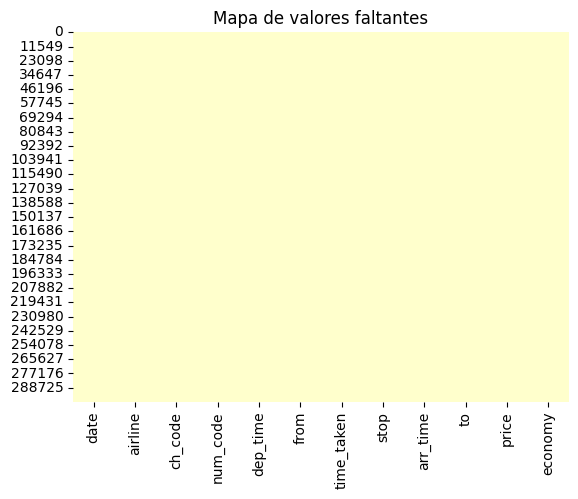

In [13]:
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Mapa de valores faltantes")
plt.show()

In [14]:
# ---------------------------------------------------------------
# Funcion para convertir a DataType

def df_ConvertColumn_toDataType(df: pd.DataFrame, namecolumn: str, data_type: str):
    # Verificamos si la columna es de tipo object
    if df[namecolumn].dtype == "object":
        # Aplicamos la transformación:
        # - Si el valor no es nulo, lo convertimos
        # - Si es nulo, lo dejamos como nulo
        if data_type == "string":
            df[namecolumn] = df[namecolumn].apply(lambda x: str(x) if pd.notnull(x) else np.nan)

        elif data_type == "float":
            df[namecolumn] = df[namecolumn].apply(lambda x: float(x) if pd.notnull(x) else np.nan)

        elif data_type == "int":
            df[namecolumn] = df[namecolumn].apply(lambda x: int(float(x)) if pd.notnull(x) else np.nan)  # Evita error con strings tipo '3.0'

        elif data_type == "datetime":
            df[namecolumn] = pd.to_datetime(df[namecolumn], errors='coerce')  # convierte y pone NaT si hay error

        else:
            raise ValueError(f"Tipo de dato '{data_type}' no soportado. Usa: string, float, int, datetime.")

    return df

# ---------------------------------------------------------------
# Funcion para convertir "timetaken" a float

def timetaken_tofloat(x:str):
    x_ = x.strip().replace(" ","")
    horas = 0
    minutos = 0

    if x_.split("h")[0] != "":
        horas = float(x_.split("h")[0])
    else:
        horas = 0

    if x_.split("h")[1].replace("m","") != "":
        minutos = float(x_.split("h")[1].replace("m",""))
    else:
        minutos = 0
    
    total_horas = horas + minutos/60

    return total_horas

# ---------------------------------------------------------------
# Funcion para extraer "non-stop"

def stop_non_stop(x:str):
    x_ = x.strip()
    if "non-stop" in x_:
        return 1
    else: 
        return 0

# ---------------------------------------------------------------
# Funcion para extraer "1-stop"

def stop_one_stop(x:str):
    x_ = x.strip()
    if "1-stop" in x_:
        return 1
    else: 
        return 0

# ---------------------------------------------------------------
# Funcion para extraer name de "1-stop"

def stop_one_stop_name(x:str):
    x_ = x.strip()
    if "1-stop" in x_:
        x_1 = x_.replace("1-stop", "")
        if x_1 == "":
            return np.nan
        else:
            return x_1        
    else: 
        return np.nan

# ---------------------------------------------------------------
# Funcion para extraer "2+-stop"

def stop_two_stop(x:str):
    x_ = x.strip()
    if "2+-stop" in x_:
        return 1
    else: 
        return 0



In [15]:
# ---------------------------------------------------------------
# Funcion para dar formato al dataset

def df_Flights_Format (df: pd.DataFrame):
    
    df_=df.copy()
    df_.drop_duplicates(inplace=True)

    df_ConvertColumn_toDataType(df=df_, namecolumn="date", data_type="datetime")
    df_ConvertColumn_toDataType(df=df_, namecolumn="airline", data_type="string")
    df_ConvertColumn_toDataType(df=df_, namecolumn="ch_code", data_type="string")
    df_ConvertColumn_toDataType(df=df_, namecolumn="num_code", data_type="int")
    df_ConvertColumn_toDataType(df=df_, namecolumn="dep_time", data_type="string")
    df_ConvertColumn_toDataType(df=df_, namecolumn="from", data_type="string")
    df_ConvertColumn_toDataType(df=df_, namecolumn="time_taken", data_type="string")
    df_ConvertColumn_toDataType(df=df_, namecolumn="stop", data_type="string")
    df_ConvertColumn_toDataType(df=df_, namecolumn="arr_time", data_type="string")
    df_ConvertColumn_toDataType(df=df_, namecolumn="to", data_type="string")
    df_ConvertColumn_toDataType(df=df_, namecolumn="price", data_type="string")
    df_ConvertColumn_toDataType(df=df_, namecolumn="economy", data_type="int")

    # ---------------------------------------------------------------
    # Trabajando columna "date"

    df_["date_year"] = df_["date"].dt.year
    df_["date_month"] = df_["date"].dt.month
    df_["date_day"] = df_["date"].dt.day

    # ---------------------------------------------------------------
    # Trabajando columna "price"

    df_["price"] = df_["price"].apply(lambda x: float(x.strip().replace(",", "")) if pd.notnull(x) else np.nan)

    # ---------------------------------------------------------------
    # Trabajando columna "dep_time"

    df_["dep_militartime"] = df_["dep_time"].apply(lambda x: int(x.strip().replace(":", "").replace(" ", "")) if pd.notnull(x) else np.nan)

    # ---------------------------------------------------------------
    # Trabajando columna "time_taken"

    df_["float_time_taken"] = df_["time_taken"].apply(lambda x: timetaken_tofloat(x) if pd.notnull(x) else np.nan)

    # ---------------------------------------------------------------
    # Trabajando columna "arr_time"

    df_["arr_militartime"] = df_["arr_time"].apply(lambda x: int(x.strip().replace(":", "").replace(" ","")) if pd.notnull(x) else np.nan)

    # ---------------------------------------------------------------
    # Trabajando columna "stop"

    df_["non-stop"] = df_["stop"].apply(lambda x: stop_non_stop(x) if pd.notnull(x) else np.nan)
    df_["1-stop"] = df_["stop"].apply(lambda x: stop_one_stop(x) if pd.notnull(x) else np.nan)
    df_["2+-stop"] = df_["stop"].apply(lambda x: stop_two_stop(x) if pd.notnull(x) else np.nan)
    df_["non-stop-name"] = df_["stop"].apply(lambda x: stop_one_stop_name(x) if pd.notnull(x) else np.nan)

    # ---------------------------------------------------------------
    # Borrando columnas

    df_.drop(["date", "dep_time", "time_taken", "arr_time", "stop"], axis=1, inplace=True)


    return df_



In [16]:
# Aplicamos la funcion df_Anime_Format para dar formato al dataset
df_formated = df_Flights_Format(df)
df_formated

,airline,ch_code,num_code,from,to,price,economy,date_year,date_month,date_day,dep_militartime,float_time_taken,arr_militartime,non-stop,1-stop,2+-stop,non-stop-name
0,Air India,AI,868,Delhi,Mumbai,25612.0,0,2022,2,11,180000,2.000000,200000,1,0,0,NaN
1,Air India,AI,624,Delhi,Mumbai,25612.0,0,2022,2,11,190000,2.250000,211500,1,0,0,NaN
2,Air India,AI,531,Delhi,Mumbai,42220.0,0,2022,2,11,200000,24.750000,204500,0,1,0,NaN
3,Air India,AI,839,Delhi,Mumbai,44450.0,0,2022,2,11,212500,26.500000,235500,0,1,0,NaN
4,Air India,AI,544,Delhi,Mumbai,46690.0,0,2022,2,11,171500,6.666667,235500,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,UK,832,Chennai,Hyderabad,7697.0,1,2022,3,31,70500,13.833333,205500,0,1,0,NaN
300257,Vistara,UK,832,Chennai,Hyderabad,7709.0,1,2022,3,31,70500,13.833333,205500,0,1,0,NaN
300258,Vistara,UK,826,Chennai,Hyderabad,8640.0,1,2022,3,31,123000,20.583333,90500,0,1,0,NaN
300259,Vistara,UK,822,Chennai,Hyderabad,8640.0,1,2022,3,31,94500,23.333333,90500,0,1,0,NaN


In [17]:
# ---------------------------------------------------------------
# Funcion para codificar variables categoricas

def df_Encoding(df:pd.DataFrame, columns_dummies:list, columns_frecuency:list):
    
    df_=df.copy()

    # ---------------------------------------------------------------
    # Aplicando get_dummies

    df_encoded = pd.get_dummies(data=df_, prefix_sep="_", columns=columns_dummies, dtype=int)

    # ---------------------------------------------------------------
    # Aplicando frecuency encoding
    
    for col in columns_frecuency:
        freq_map = df_encoded[col].value_counts(normalize=True)
        df_encoded[col + "_freq"] = df_encoded[col].map(freq_map)
        df_encoded[col + "_freq"] = df_encoded[col + "_freq"].apply(lambda x: x if pd.notnull(x) else 0)

    # ---------------------------------------------------------------
    # Borrando Columnas

    df_encoded.drop(columns_frecuency, axis=1, inplace=True)
    
    return df_encoded

In [18]:
# Aplicamos la funcion df_Encoding para dar codificar las variables categoricas

columns_numeric_continuous = ["num_code", "price", "date_year", "date_month", "date_day", "dep_militartime", "float_time_taken", "arr_militartime"]
columns_dummies = ["airline", "ch_code", "from", "to"]
columns_frecuency = ["non-stop-name"]


df_encoded = df_Encoding(df=df_formated, 
                         columns_dummies=columns_dummies, 
                         columns_frecuency=columns_frecuency)
df_encoded

,num_code,price,economy,date_year,date_month,date_day,dep_militartime,float_time_taken,arr_militartime,non-stop,...,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,non-stop-name_freq
0,868,25612.0,0,2022,2,11,180000,2.000000,200000,1,...,0,0,0,0,0,0,0,0,1,0.0
1,624,25612.0,0,2022,2,11,190000,2.250000,211500,1,...,0,0,0,0,0,0,0,0,1,0.0
2,531,42220.0,0,2022,2,11,200000,24.750000,204500,0,...,0,0,0,0,0,0,0,0,1,0.0
3,839,44450.0,0,2022,2,11,212500,26.500000,235500,0,...,0,0,0,0,0,0,0,0,1,0.0
4,544,46690.0,0,2022,2,11,171500,6.666667,235500,0,...,0,0,0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,832,7697.0,1,2022,3,31,70500,13.833333,205500,0,...,0,0,0,0,0,0,1,0,0,0.0
300257,832,7709.0,1,2022,3,31,70500,13.833333,205500,0,...,0,0,0,0,0,0,1,0,0,0.0
300258,826,8640.0,1,2022,3,31,123000,20.583333,90500,0,...,0,0,0,0,0,0,1,0,0,0.0
300259,822,8640.0,1,2022,3,31,94500,23.333333,90500,0,...,0,0,0,0,0,0,1,0,0,0.0


In [19]:
# Tipos de Datos y No Nulos
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 300260
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   num_code            300259 non-null  int64  
 1   price               300259 non-null  float64
 2   economy             300259 non-null  int64  
 3   date_year           300259 non-null  int32  
 4   date_month          300259 non-null  int32  
 5   date_day            300259 non-null  int32  
 6   dep_militartime     300259 non-null  int64  
 7   float_time_taken    300259 non-null  float64
 8   arr_militartime     300259 non-null  int64  
 9   non-stop            300259 non-null  int64  
 10  1-stop              300259 non-null  int64  
 11  2+-stop             300259 non-null  int64  
 12  airline_Air India   300259 non-null  int32  
 13  airline_AirAsia     300259 non-null  int32  
 14  airline_GO FIRST    300259 non-null  int32  
 15  airline_Indigo      300259 non-null  in

### Actividad 3

Genera un análisis exploratorio de los dataset entregados, un análisis univariado y bivariado. Prioriza los gráficos más importantes y entrega una conclusión a partir de estos.

In [20]:
df_encoded[columns_numeric_continuous].describe()

,num_code,price,date_year,date_month,date_day,dep_militartime,float_time_taken,arr_militartime
count,300259.000000,300259.000000,300259.0,300259.000000,300259.000000,300259.000000,300259.000000,300259.000000
mean,1417.776883,20883.800386,2022.0,2.664996,17.384645,132537.217869,12.217706,155338.211344
std,1974.519951,22695.962230,0.0,0.471993,8.074025,53769.351730,7.192923,60491.278081
min,101.000000,1105.000000,2022.0,2.000000,1.000000,1000.000000,0.833333,500.000000
25%,637.000000,4783.000000,2022.0,2.000000,12.000000,83000.000000,6.750000,103500.000000
50%,818.000000,7425.000000,2022.0,3.000000,18.000000,125500.000000,11.250000,170500.000000
75%,927.000000,42521.000000,2022.0,3.000000,24.000000,183000.000000,16.166667,204500.000000
max,9991.000000,123071.000000,2022.0,3.000000,31.000000,235500.000000,49.833333,235900.000000


In [22]:
# Método para graficar
def plot_df_columns(
    df: pd.DataFrame,
    tipo: str = "histplot",
    figsize=(14, 8),
    kde: bool = False,
    bins_list=None,
    stat: str = "count"
):
    """
    Grafica todas las columnas numéricas de un DataFrame en subplots.
    
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame con los datos.
    tipo : {"hisplot","histplot","boxplot"}
        Tipo de gráfico por subplot. Se acepta el typo "hisplot" (histplot).
    figsize : tuple
        Tamaño de la figura en pulgadas (ancho, alto) para plt.subplots.
    kde : bool
        Si True, añade curva KDE en histplot. Ignorado en boxplot.
    bins_list : list | None
        Lista con los bins a usar para cada columna (solo histplot).
        - Puede contener enteros, secuencias de bordes, o None.
        - Si la lista es más corta que el número de columnas, las
          faltantes usarán "auto".
    stat : {"count","frequency","density","probability"}
        Estadístico para histplot (ignorado en boxplot).
    """
    # Normalizar tipo
    tipo = (tipo or "").lower().strip()
    if tipo == "hisplot":  # aceptar el typo pedido
        tipo = "histplot"
    if tipo not in {"histplot", "boxplot"}:
        raise ValueError('tipo debe ser "hisplot"/"histplot" o "boxplot".')

    # Solo columnas numéricas (ambos gráficos requieren datos numéricos)
    cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(cols) == 0:
        raise ValueError("No hay columnas numéricas para graficar.")

    n = len(cols)
    # Distribuir subplots en una cuadrícula "cuadrada"
    ncols = math.ceil(math.sqrt(n))
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = np.array(axes).reshape(-1) if isinstance(axes, np.ndarray) else np.array([axes])

    # Preparar bins por columna si corresponde
    if bins_list is None:
        bins_list = []
    # Asegurar longitud
    if len(bins_list) < n:
        bins_list = list(bins_list) + ["auto"] * (n - len(bins_list))

    for i, col in enumerate(cols):
        ax = axes[i]
        serie = df[col].dropna()

        if tipo == "histplot":
            bins = bins_list[i]
            sns.histplot(serie, bins=bins, kde=kde, stat=stat, ax=ax)
        else:  # boxplot
            sns.boxplot(x=serie, ax=ax)

        ax.set_title(str(col))

    # Ocultar axes no usados si la rejilla es más grande que n
    for j in range(n, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

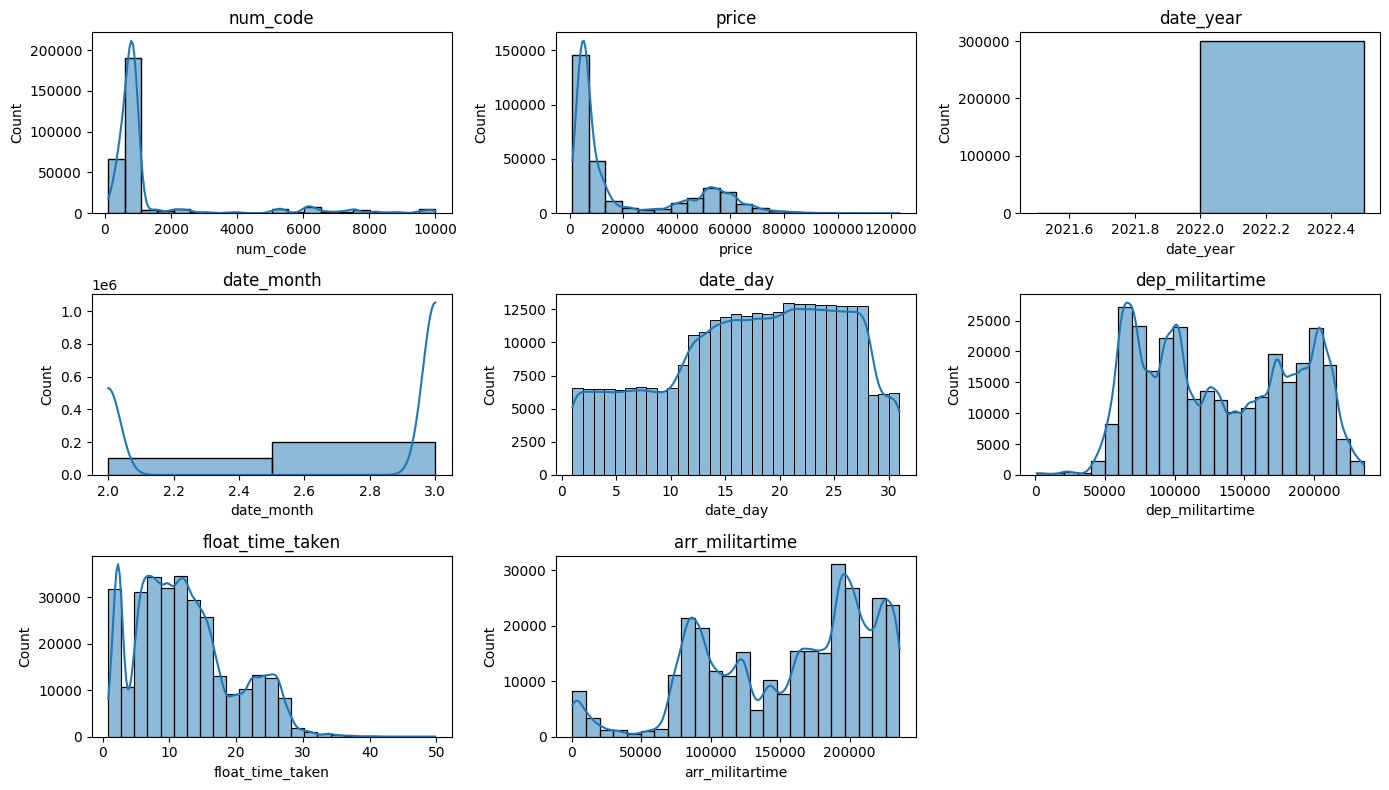

In [23]:
# Graficando histogramas para columnas numericas conitnuas (No categóricas)

plot_df_columns(df= df_encoded[columns_numeric_continuous], tipo= "histplot", figsize=(14, 8), kde= True, bins_list=[20, 20, 2, 2, 31, 24, 25, 24], stat= "count")

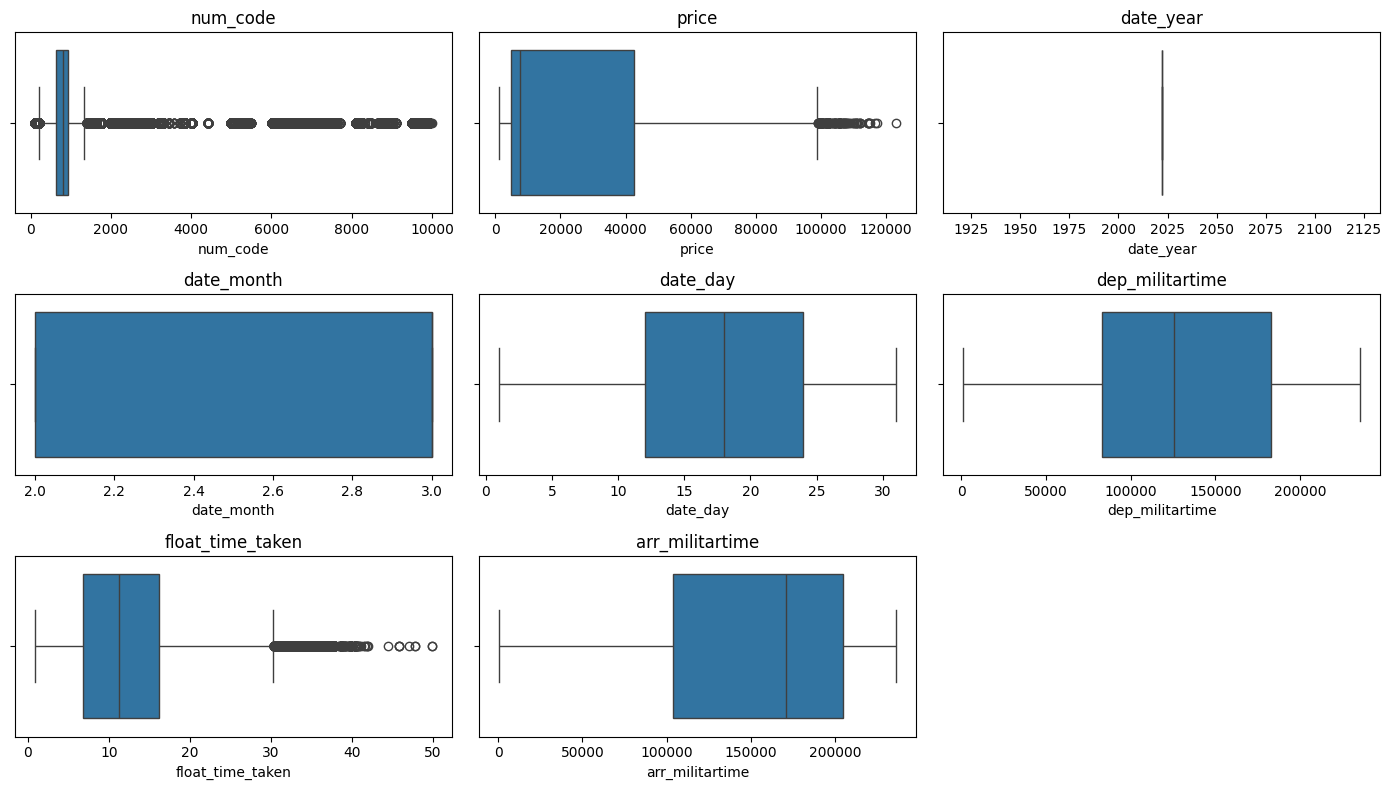

In [24]:
# Graficando boxplot para columnas numericas conitnuas (No categóricas)

plot_df_columns(df= df_encoded[columns_numeric_continuous], tipo= "boxplot", figsize=(14, 8), kde= True, bins_list=[20, 20, 2, 2, 31, 24, 25, 24], stat= "count")

In [26]:
def df_outliers_analysis(df:pd.DataFrame, columns_to_analize:list):

    # Copia de trabajo
    df_ = df.copy()

    # Configurar Isolation Forest
    iso = IsolationForest(contamination=0.05, random_state=42)

    # Detectar outliers columna por columna
    outlier_flags = {}
    for col in columns_to_analize:
        values = df[[col]].dropna()
        preds = iso.fit_predict(values)  # -1 = outlier, 1 = normal
        mask = pd.Series(preds, index=values.index).map({1: False, -1: True})
        outlier_flags[col] = mask

    # ---------------------------------------
    # Graficar matriz de histogramas
    
    n_cols = 3
    n_rows = int(np.ceil(len(columns_to_analize) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(columns_to_analize):
        ax = axes[i]

        # Histogram normales
        sns.histplot(df[col], bins=30, kde=False, color="skyblue", ax=ax, label="Normal")

        # Superponer outliers en rojo
        out_vals = df.loc[outlier_flags[col], col]
        sns.histplot(out_vals, bins=30, kde=False, color="red", ax=ax, label="Outliers")

        ax.set_title(f"Histograma con Outliers - {col}")
        ax.legend()

    # Quitar ejes vacíos si sobran
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    return pd.DataFrame(outlier_flags)

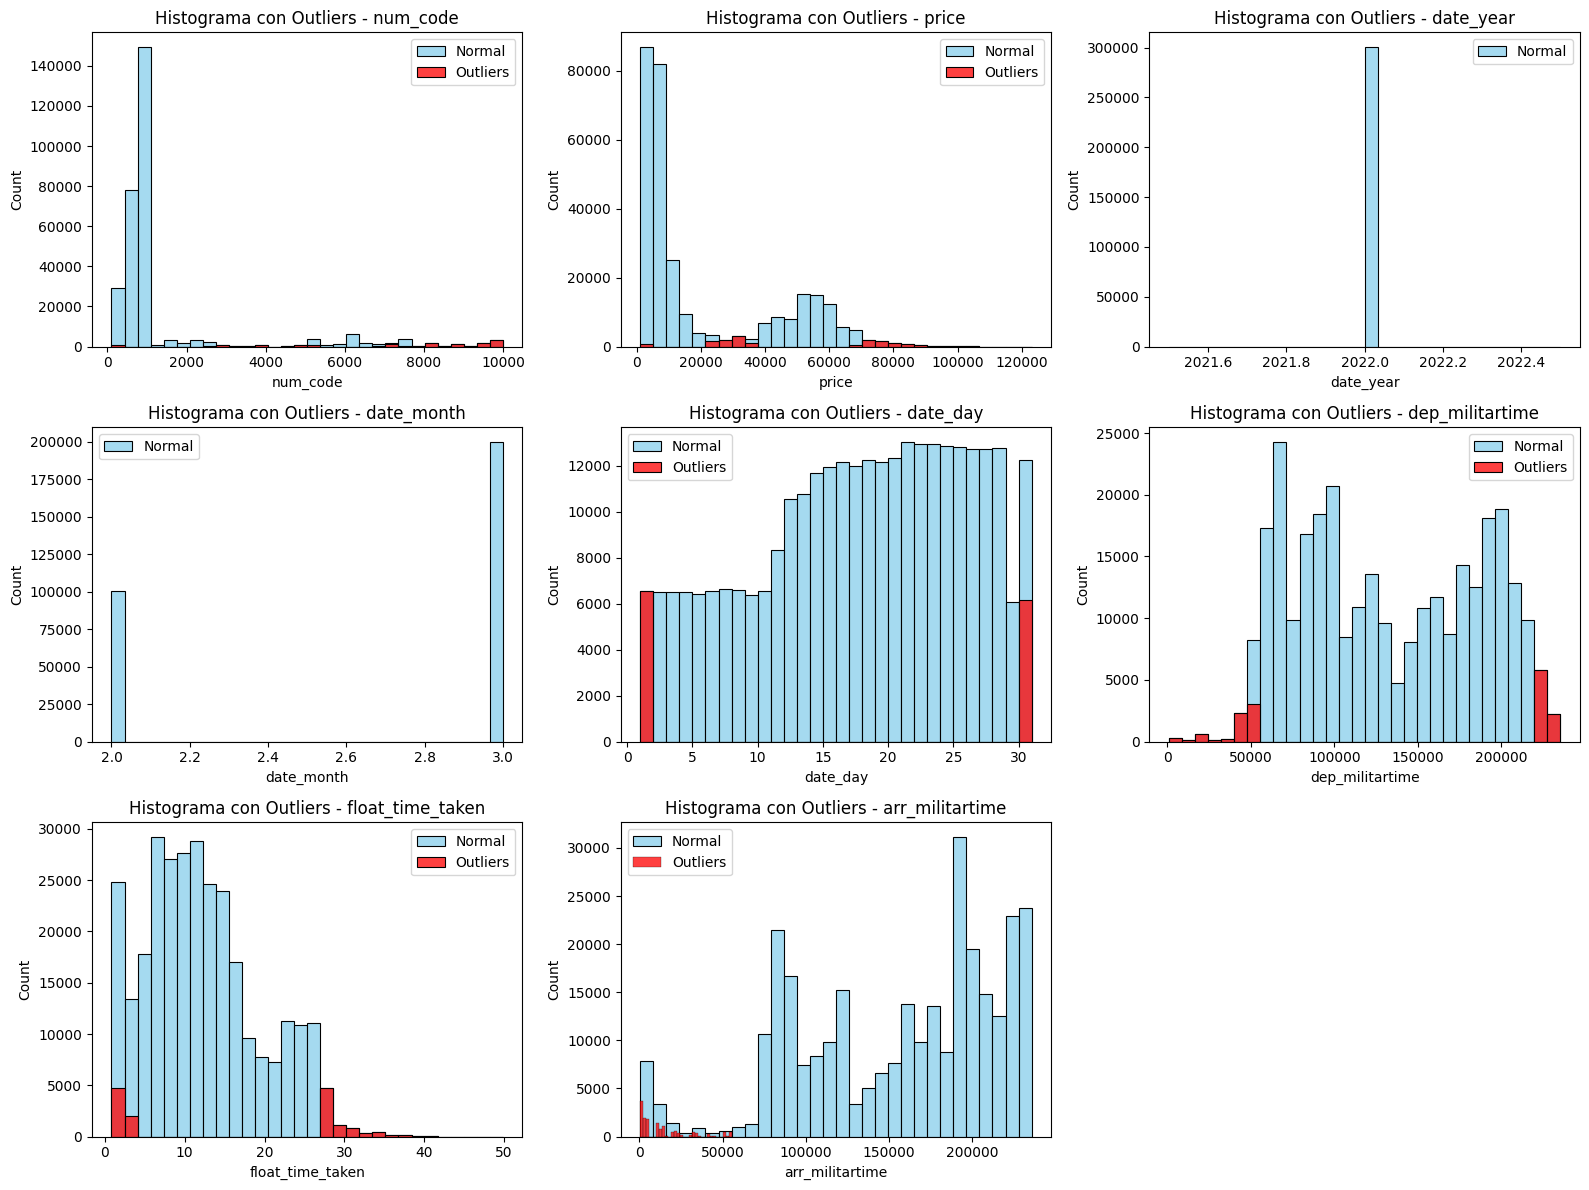

In [27]:
df_outliers = df_outliers_analysis(df=df_encoded, columns_to_analize=columns_numeric_continuous)

In [28]:
df_outliers

,num_code,price,date_year,date_month,date_day,dep_militartime,float_time_taken,arr_militartime
0,False,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
300256,False,False,False,False,True,False,False,False
300257,False,False,False,False,True,False,False,False
300258,False,False,False,False,True,False,False,False
300259,False,False,False,False,True,False,False,False


In [29]:
# Aunque los hemos identificado, no eliminaremos los outliers, porque nos pueden entregar datos valiosos para los modelos

### Actividad 6

Genera una función que encapsule el tratamiento de datos necesario, para entregar un dataset limpio y procesado a partir del dataset original.

In [30]:
def Process_Dataframe(df:pd.DataFrame):
    
    df_ = df.copy()
    df_formated = df_Flights_Format(df_)
    columns_dummies = ["airline", "ch_code", "from", "to"]
    columns_frecuency = ["non-stop-name"]
    df_encoded = df_Encoding(df=df_formated, 
                         columns_dummies=columns_dummies, 
                         columns_frecuency=columns_frecuency)
    
    return df_encoded

In [31]:
df_processed = Process_Dataframe(df)
df_processed

,num_code,price,economy,date_year,date_month,date_day,dep_militartime,float_time_taken,arr_militartime,non-stop,...,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,non-stop-name_freq
0,868,25612.0,0,2022,2,11,180000,2.000000,200000,1,...,0,0,0,0,0,0,0,0,1,0.0
1,624,25612.0,0,2022,2,11,190000,2.250000,211500,1,...,0,0,0,0,0,0,0,0,1,0.0
2,531,42220.0,0,2022,2,11,200000,24.750000,204500,0,...,0,0,0,0,0,0,0,0,1,0.0
3,839,44450.0,0,2022,2,11,212500,26.500000,235500,0,...,0,0,0,0,0,0,0,0,1,0.0
4,544,46690.0,0,2022,2,11,171500,6.666667,235500,0,...,0,0,0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,832,7697.0,1,2022,3,31,70500,13.833333,205500,0,...,0,0,0,0,0,0,1,0,0,0.0
300257,832,7709.0,1,2022,3,31,70500,13.833333,205500,0,...,0,0,0,0,0,0,1,0,0,0.0
300258,826,8640.0,1,2022,3,31,123000,20.583333,90500,0,...,0,0,0,0,0,0,1,0,0,0.0
300259,822,8640.0,1,2022,3,31,94500,23.333333,90500,0,...,0,0,0,0,0,0,1,0,0,0.0


In [32]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 300260
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   num_code            300259 non-null  int64  
 1   price               300259 non-null  float64
 2   economy             300259 non-null  int64  
 3   date_year           300259 non-null  int32  
 4   date_month          300259 non-null  int32  
 5   date_day            300259 non-null  int32  
 6   dep_militartime     300259 non-null  int64  
 7   float_time_taken    300259 non-null  float64
 8   arr_militartime     300259 non-null  int64  
 9   non-stop            300259 non-null  int64  
 10  1-stop              300259 non-null  int64  
 11  2+-stop             300259 non-null  int64  
 12  airline_Air India   300259 non-null  int32  
 13  airline_AirAsia     300259 non-null  int32  
 14  airline_GO FIRST    300259 non-null  int32  
 15  airline_Indigo      300259 non-null  in

### Actividad 4

Realiza un análisis de correlaciones entre las diferentes variables existentes, identificando cuáles son las variables más importantes para la predicción de la variable objetivo. Utiliza las técnicas vistas en el curso.

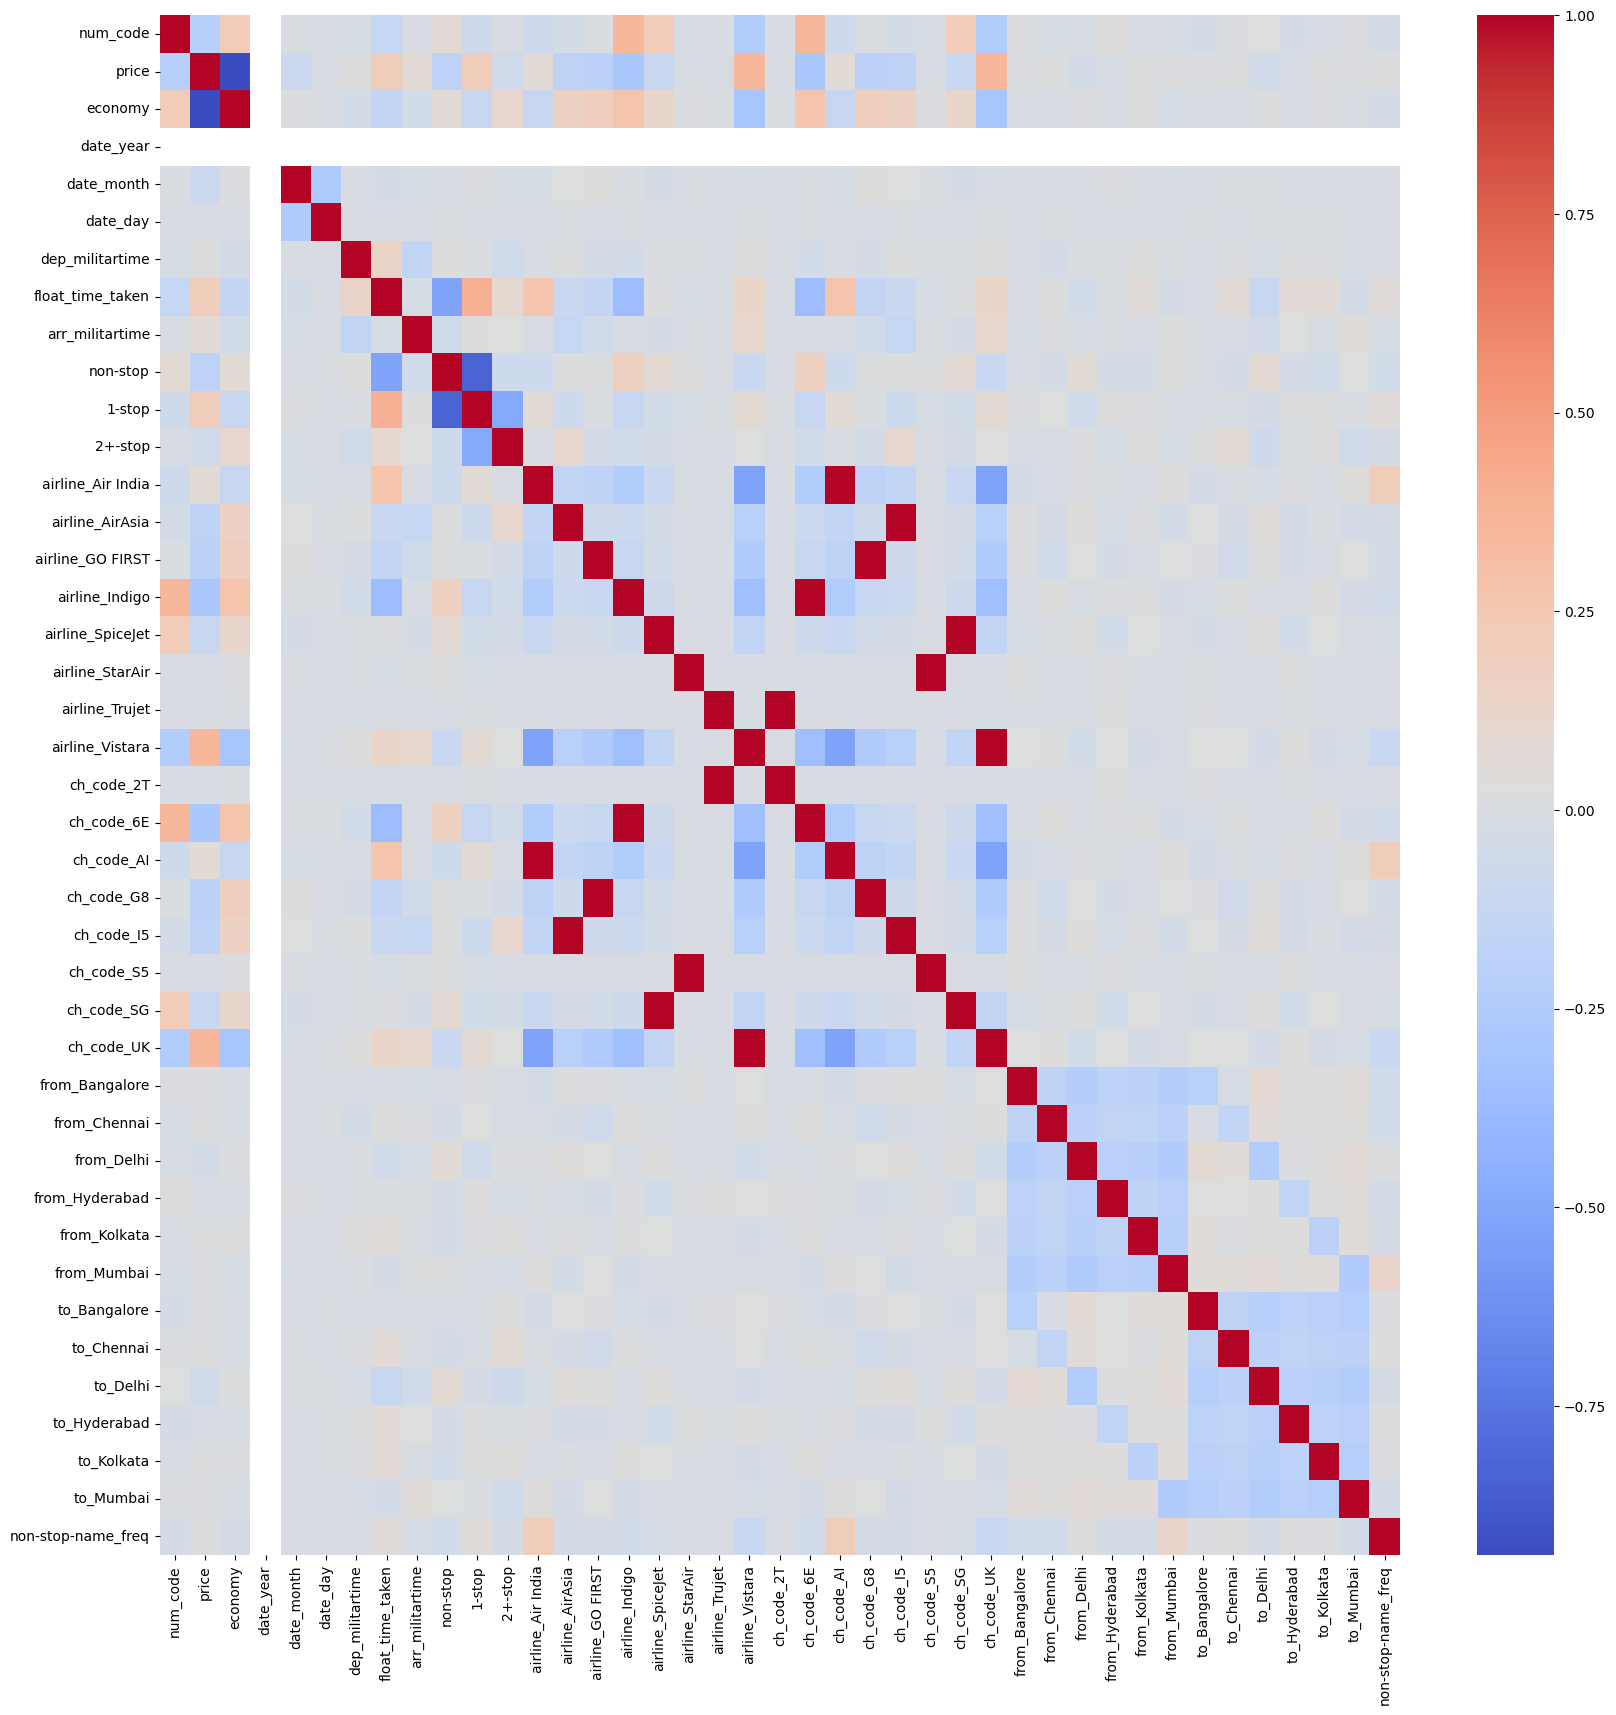

In [33]:
# Matriz de Correlacion de Pearson para relacionar variables numericas, no utilizaremos chi-cuadrado o ANOVA 
# porque buscamos relacionar todas las variable con una variable numérica principal: price. 
# Chi-cuadrado y ANOVA se utiliza para correlacionar con variables objetivo categoricas, que no es el caso

# Graficar Correlaciones
plt.figure(figsize=(20,20))
sns.heatmap(df_processed.corr(method="pearson"), annot=False, cmap='coolwarm')
plt.show()

In [34]:
# Calcular matriz de correlación
correlation_matrix = df_processed.corr(method="pearson")
correlation_matrix 

,num_code,price,economy,date_year,date_month,date_day,dep_militartime,float_time_taken,arr_militartime,non-stop,...,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,non-stop-name_freq
num_code,1.000000,-0.212867,0.217170,NaN,0.001857,-0.009887,-0.015131,-0.133752,-0.005988,0.076570,...,0.038782,-0.005436,-0.016430,-0.022959,0.008902,0.027186,-0.024108,-0.002720,0.010916,-0.031942
price,-0.212867,1.000000,-0.937868,NaN,-0.092322,-0.003268,0.032105,0.204478,0.075602,-0.187399,...,-0.013125,0.016235,0.013289,0.013856,0.018572,-0.052399,-0.008507,0.021061,0.010594,0.017354
economy,0.217170,-0.937868,1.000000,NaN,0.013798,-0.000710,-0.038900,-0.138962,-0.051076,0.069056,...,-0.003106,0.019059,-0.016019,-0.005436,-0.012424,0.021088,-0.007336,0.012886,-0.010632,-0.035701
date_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_month,0.001857,-0.092322,0.013798,NaN,1.000000,-0.262160,-0.002811,-0.038656,-0.019893,-0.003997,...,0.010913,0.000536,-0.007059,0.000502,0.003257,0.005244,-0.001128,-0.005296,-0.002518,-0.004349
date_day,-0.009887,-0.003268,-0.000710,NaN,-0.262160,1.000000,-0.002244,-0.002409,-0.005141,0.004358,...,0.000252,-0.000420,-0.003083,0.001611,-0.004554,0.001884,0.001823,0.002222,-0.003155,-0.002569
dep_militartime,-0.015131,0.032105,-0.038900,NaN,-0.002811,-0.002244,1.000000,0.142697,-0.157039,0.032996,...,0.004457,0.037568,0.005663,-0.003456,0.014379,-0.020401,0.022301,0.012139,-0.019834,-0.004558
float_time_taken,-0.133752,0.204478,-0.138962,NaN,-0.038656,-0.002409,0.142697,1.000000,-0.021206,-0.514911,...,0.002052,0.061307,-0.023126,-0.010619,0.061435,-0.115170,0.065321,0.061609,-0.043732,0.058906
arr_militartime,-0.005988,0.075602,-0.051076,NaN,-0.019893,-0.005141,-0.157039,-0.021206,1.000000,-0.059819,...,0.003530,0.000539,0.017494,-0.005720,-0.000247,-0.056594,0.026177,-0.008641,0.046627,-0.015221
non-stop,0.076570,-0.187399,0.069056,NaN,-0.003997,0.004358,0.032996,-0.514911,-0.059819,1.000000,...,-0.026508,-0.037173,0.018043,-0.006479,-0.031027,0.082193,-0.030225,-0.049263,0.024035,-0.045747


In [35]:
# ---------------------------------------------------------------
# FILTROS BASADOS EN CORRELACIONES
# Filtrar columnas en base a las correlaciones que existen respecto a una columna objetivo

def Features_Filtered_Corr(df:pd.DataFrame, column_y:str, delta:float = 0.7):

    df_ = df.copy()

    # Calcular matriz de correlación absoluta
    correlation_matrix_abs = df_.corr().abs()

    columns_names_to_drop = []

    # Iterar sobre los nombres de las columnas
    for feature in correlation_matrix_abs.index:
        if feature != column_y:
            if correlation_matrix_abs.loc[feature, column_y] > delta:
                columns_names_to_drop.append(feature)

    # Eliminar columnas correlacionadas
    df_filtered = df_.drop(columns=columns_names_to_drop, axis=1)

    return df_filtered

# ---------------------------------------------------------------
# FILTROS BASADOS EN FORWARD SELECTION
# Filtrar columnas en base a Forward Selection

def Features_Filtered_ForwardSelection(df:pd.DataFrame, column_y:str, continuous_cols_toscale:list, columns_number_toselect:int, scoring:str):
    
    # Copiar Dataframe, seleccionar X e y , y seleccionar datos de entrenamiento y test
    df_ = df.copy()
    y = df_[column_y].to_numpy().ravel()
    X = df_.drop(columns=[column_y])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convertir las continuas a índices para el ColumnTransformer
    cont_idx = [X.columns.get_loc(c) for c in continuous_cols_toscale]

    # Aplicar ColumnTransformer para escalar columnas continuas
    preprocessor = ColumnTransformer(
        transformers=[
            ("scale", StandardScaler(), cont_idx),   # escalar continuas
        ],
        remainder="passthrough",                    # dejar dummies/otras numéricas igual
        verbose_feature_names_out=False
    )

    # Modelo base
    base_lasso = Lasso(alpha=0.01, random_state=42, max_iter=10000)

    # Pipeline: prep -> sfs
    pipe = Pipeline([
        ("prep", preprocessor),
        ("sfs", SequentialFeatureSelector(
            estimator=base_lasso,
            n_features_to_select=columns_number_toselect,
            direction="forward",
            scoring=scoring,
            cv=2,
            n_jobs=-1
        ))
    ])

    # Entrenar pipeline
    pipe.fit(X_train, y_train)

    # Recuperar nombres originales seleccionados
    feat_names = X.columns
    mask = pipe.named_steps["sfs"].get_support()
    selected_features = list(feat_names[mask])

    # Construir DataFrame con y + features seleccionados
    df_selected = df_[[column_y] + selected_features]

    return df_selected

# ---------------------------------------------------------------
# FILTROS BASADOS EN FEATURES IMPORTANCE
# Filtrar columnas en base a Features Importance

def Feature_Importance(df: pd.DataFrame, column_y:str, continuous_cols_toscale:list, columns_number_toselect:int):

   # Copiar Dataframe, seleccionar X e y , y seleccionar datos de entrenamiento y test
    df_ = df.copy()
    y = df_[column_y].to_numpy().ravel()
    X = df_.drop(columns=[column_y])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convertir las continuas a índices para el ColumnTransformer
    cont_idx = [X.columns.get_loc(c) for c in continuous_cols_toscale]

    # Aplicar ColumnTransformer para escalar columnas continuas
    preprocessor = ColumnTransformer(
        transformers=[
            ("scale", StandardScaler(), cont_idx),   # escalar continuas
        ],
        remainder="passthrough",                    # dejar dummies/otras numéricas igual
        verbose_feature_names_out=False
    )

    # Modelo base
    base_lasso = Lasso(alpha=0.01, random_state=42, max_iter=10000)

    # Pipeline: prep -> lasso
    pipe = Pipeline([
        ("prep", preprocessor),
        ("lasso", base_lasso)
    ])

    # Entrenar modelo
    pipe.fit(X_train, y_train)

    # Obtener importancias absolutas
    coef = np.abs(pipe.named_steps['lasso'].coef_)

    # Crear dataframe Features/Importance con las columnas seleccionadas más importantes 
    df_lasso_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': coef
    }).sort_values(by='Importance', ascending=False).head(columns_number_toselect)

    # Crear gráfico
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(data=df_lasso_importance, x='Importance', y='Feature', palette='Blues_r', ax=ax, hue='Feature', legend=False)
    ax.set_title(f'Top {columns_number_toselect} variables más relevantes - Lasso')
    plt.tight_layout()

    # 7. Crear nuevo DataFrame con columnas seleccionadas + target
    top_features = df_lasso_importance['Feature'].tolist()
    df_selected = df_[top_features + [column_y]].copy()

    return fig, df_lasso_importance, df_selected


In [36]:
df_filtered_corr = Features_Filtered_Corr(df=df_processed, column_y = "price", delta = 0.6)
df_filtered_corr

,num_code,price,date_year,date_month,date_day,dep_militartime,float_time_taken,arr_militartime,non-stop,1-stop,...,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,non-stop-name_freq
0,868,25612.0,2022,2,11,180000,2.000000,200000,1,0,...,0,0,0,0,0,0,0,0,1,0.0
1,624,25612.0,2022,2,11,190000,2.250000,211500,1,0,...,0,0,0,0,0,0,0,0,1,0.0
2,531,42220.0,2022,2,11,200000,24.750000,204500,0,1,...,0,0,0,0,0,0,0,0,1,0.0
3,839,44450.0,2022,2,11,212500,26.500000,235500,0,1,...,0,0,0,0,0,0,0,0,1,0.0
4,544,46690.0,2022,2,11,171500,6.666667,235500,0,1,...,0,0,0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,832,7697.0,2022,3,31,70500,13.833333,205500,0,1,...,0,0,0,0,0,0,1,0,0,0.0
300257,832,7709.0,2022,3,31,70500,13.833333,205500,0,1,...,0,0,0,0,0,0,1,0,0,0.0
300258,826,8640.0,2022,3,31,123000,20.583333,90500,0,1,...,0,0,0,0,0,0,1,0,0,0.0
300259,822,8640.0,2022,3,31,94500,23.333333,90500,0,1,...,0,0,0,0,0,0,1,0,0,0.0


In [37]:
columns_numeric_continuous_toscale = ["num_code", "date_year", "date_month", "date_day", "dep_militartime", "float_time_taken", "arr_militartime", "non-stop-name_freq"]

df_filtered_forwardselection = Features_Filtered_ForwardSelection(df = df_processed, 
                                                                  column_y = "price", 
                                                                  continuous_cols_toscale = columns_numeric_continuous_toscale, 
                                                                  columns_number_toselect = 20, 
                                                                  scoring = "r2")
df_filtered_forwardselection

,price,num_code,date_year,date_month,dep_militartime,float_time_taken,arr_militartime,non-stop,1-stop,airline_Air India,...,ch_code_2T,ch_code_I5,ch_code_S5,from_Hyderabad,from_Kolkata,from_Mumbai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,25612.0,868,2022,2,180000,2.000000,200000,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,25612.0,624,2022,2,190000,2.250000,211500,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,42220.0,531,2022,2,200000,24.750000,204500,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,44450.0,839,2022,2,212500,26.500000,235500,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,46690.0,544,2022,2,171500,6.666667,235500,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,7697.0,832,2022,3,70500,13.833333,205500,0,1,0,...,0,0,0,0,0,0,0,1,0,0
300257,7709.0,832,2022,3,70500,13.833333,205500,0,1,0,...,0,0,0,0,0,0,0,1,0,0
300258,8640.0,826,2022,3,123000,20.583333,90500,0,1,0,...,0,0,0,0,0,0,0,1,0,0
300259,8640.0,822,2022,3,94500,23.333333,90500,0,1,0,...,0,0,0,0,0,0,0,1,0,0


,non-stop,1-stop,airline_Vistara,airline_GO FIRST,airline_AirAsia,airline_Trujet,date_year,from_Mumbai,airline_Air India,to_Kolkata,...,dep_militartime,float_time_taken,to_Chennai,arr_militartime,from_Chennai,non-stop-name_freq,num_code,ch_code_AI,from_Delhi,price
0,1,0,0,0,0,0,2022,0,1,0,...,180000,2.000000,0,200000,0,0.0,868,1,1,25612.0
1,1,0,0,0,0,0,2022,0,1,0,...,190000,2.250000,0,211500,0,0.0,624,1,1,25612.0
2,0,1,0,0,0,0,2022,0,1,0,...,200000,24.750000,0,204500,0,0.0,531,1,1,42220.0
3,0,1,0,0,0,0,2022,0,1,0,...,212500,26.500000,0,235500,0,0.0,839,1,1,44450.0
4,0,1,0,0,0,0,2022,0,1,0,...,171500,6.666667,0,235500,0,0.0,544,1,1,46690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,0,1,1,0,0,0,2022,0,0,0,...,70500,13.833333,0,205500,1,0.0,832,0,0,7697.0
300257,0,1,1,0,0,0,2022,0,0,0,...,70500,13.833333,0,205500,1,0.0,832,0,0,7709.0
300258,0,1,1,0,0,0,2022,0,0,0,...,123000,20.583333,0,90500,1,0.0,826,0,0,8640.0
300259,0,1,1,0,0,0,2022,0,0,0,...,94500,23.333333,0,90500,1,0.0,822,0,0,8640.0


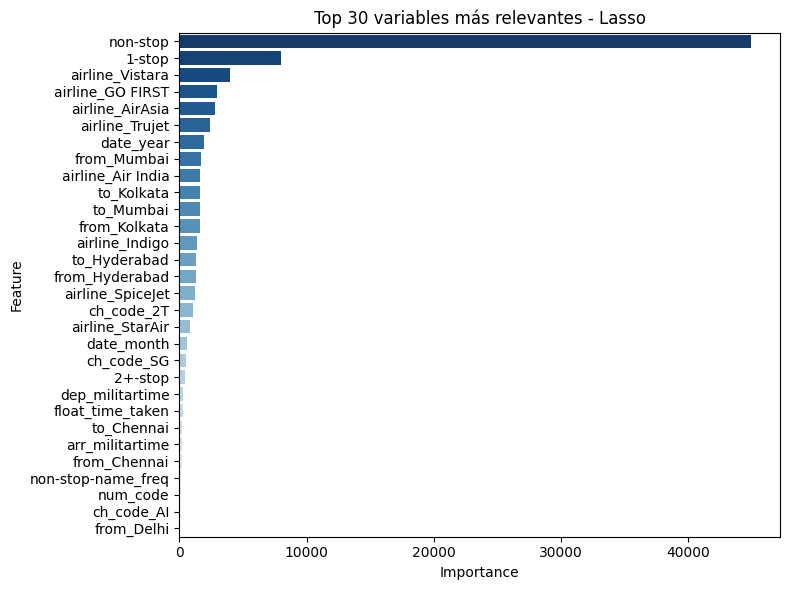

In [38]:
fig_feature_importance, df_importance, df_filtered_feature_importance = Feature_Importance(df = df_processed,
                                                                                            column_y = "price", 
                                                                                            continuous_cols_toscale = columns_numeric_continuous_toscale, 
                                                                                            columns_number_toselect = 30)

df_filtered_feature_importance

In [39]:
# Ocuparemos como datos importantes para la predicción del precio el dataframe entregado por el método Features Importance

df_filtered = df_filtered_feature_importance

### Actividad 7

Elige al menos 3 modelos candidatos para resolver el problema. A partir de esto, genera un conjunto de entrenamiento y prueba, para luego entrenar los diferentes modelos.

### Actividad 8

Elige una grilla de hiperparametros y luego optimízalos, buscando la mejor combinación para cada grilla. Guardar los modelos entrenados.

### Actividad 9

Define al menos 3 métricas para evaluar los modelos entrenados y genera gráficos de comparación. Elige un baseline para ver qué tan buena es tu opción respecto a ese baseline y concluye.

In [40]:
# ----------------------------------------------------------------
# Funcion para evaluar crear modelos de regression
def Regression_Models(df:pd.DataFrame, column_y:str, continuous_cols_toscale:list, param_grid_lasso:dict, param_grid_rf:dict, param_grid_xgb:dict):

    # Copiar Dataframe, seleccionar X e y , y seleccionar datos de entrenamiento y test
    df_ = df.copy()
    y = df_[column_y].to_numpy().ravel()
    X = df_.drop(columns=[column_y])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convertir las continuas a índices para el ColumnTransformer
    cont_idx = [X.columns.get_loc(c) for c in continuous_cols_toscale]

    # Aplicar ColumnTransformer para escalar columnas continuas
    preprocessor = ColumnTransformer(
        transformers=[
            ("scale", StandardScaler(), cont_idx),   # escalar continuas
        ],
        remainder="passthrough",                    # dejar dummies/otras numéricas igual
        verbose_feature_names_out=False
    )

    # Pipelines para cada modelo
    pipe_lasso = Pipeline([
        ("prep", preprocessor),
        ("model", Lasso(max_iter=10000))
    ])

    pipe_rf = Pipeline([
        ("prep", preprocessor),
        ("model", RandomForestRegressor())
    ])

    pipe_xgb = Pipeline([
        ("prep", preprocessor),
        ("model", XGBRegressor(verbosity=0))
    ])

    # GridSearchCV
    grid_lasso = GridSearchCV(pipe_lasso, param_grid_lasso, cv=5, scoring="r2")
    grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring="r2")
    grid_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5, scoring="r2")

    # Entrenar modelos
    grid_lasso.fit(X_train, y_train)
    grid_rf.fit(X_train, y_train)
    grid_xgb.fit(X_train, y_train)

    # Guardar mejores modelos
    best_lasso = grid_lasso.best_estimator_
    best_rf = grid_rf.best_estimator_
    best_xgb = grid_xgb.best_estimator_

    # Baseline
    dummy = DummyRegressor(strategy='mean')
    dummy.fit(X_train, y_train)

    # Generar diccionario con los mejores hiperparametros segun cada modelo

    best_params_dict = {
        "Lasso": grid_lasso.best_params_,
        "Random Forest": grid_rf.best_params_,
        "XGB Regressor": grid_xgb.best_params_,
    }

    # Guardando Modelos en archivos .joblib
    dump(best_lasso, 'best_lasso.joblib')
    dump(best_rf, 'best_random_forest.joblib')
    dump(best_xgb, 'best_xgbr_egressor.joblib')

    # Generar predicciones con cada modelo
    y_pred_lasso = best_lasso.predict(X_test)
    y_pred_rf = best_rf.predict(X_test)
    y_pred_xgb = best_rf.predict(X_test)
    y_pred_dummy = dummy.predict(X_test)

    y_pred_dict = {
        "Lasso": y_pred_lasso,
        "Random Forest": y_pred_rf,
        "XGB Regressor": y_pred_xgb,
        "Dummy Regresso": y_pred_dummy
    }

    df_y_pred = pd.DataFrame(y_pred_dict)

    df_results = {}
    for col in df_y_pred.columns:

        df_results[col] = {
        'MAE': mean_absolute_error(y_test, y_pred_dict[col]),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dict[col])),
        'R2': r2_score(y_test, y_pred_dict[col])
    }

    # Convertir resultados en DataFrame
    df_resultados_metricas = pd.DataFrame(df_results).T.reset_index().rename(columns={'index': 'Modelo'})

    # Crear figura y ejes
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))

    for i, metric in enumerate(['MAE', 'RMSE', 'R2']):
        sns.barplot(data=df_resultados_metricas, x='Modelo', y=metric, palette='viridis', ax=axs[i])
        axs[i].set_title(metric)
        axs[i].tick_params(axis='x', rotation=45)

    # Título principal
    fig.suptitle("Comparación de métricas de modelos", fontsize=16, y=1.05)
    fig.tight_layout()

    return df_resultados_metricas, best_params_dict, df_y_pred, fig


In [43]:
# Grids de hiperparámetros

param_grid_lasso = {
    "model__alpha": [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
}

param_grid_rf = {
    "model__n_estimators": [50, 100], # nº de árboles en el bosque
    "model__max_depth": [None, 3, 5, 10], # profundidad máx. de cada árbol
    "model__min_samples_split": [2, 5],
}

param_grid_xgb = {
    "model__n_estimators": [50, 100], # nº de árboles en el bosque
    "model__max_depth": [3, 5, 10], # profundidad máx. de cada árbol
    "model__learning_rate": [0.01, 0.05, 0.1], # Tasa de aprendizaje (eta)
    "model__subsample": [0.8, 1.0],       # porcentaje de muestras por árbol
    "model__colsample_bytree": [ 0.8, 1.0]  # porcentaje de columnas por árbol
}

In [44]:
df_filtered.columns

Index(['non-stop', '1-stop', 'airline_Vistara', 'airline_GO FIRST',
       'airline_AirAsia', 'airline_Trujet', 'date_year', 'from_Mumbai',
       'airline_Air India', 'to_Kolkata', 'to_Mumbai', 'from_Kolkata',
       'airline_Indigo', 'to_Hyderabad', 'from_Hyderabad', 'airline_SpiceJet',
       'ch_code_2T', 'airline_StarAir', 'date_month', 'ch_code_SG', '2+-stop',
       'dep_militartime', 'float_time_taken', 'to_Chennai', 'arr_militartime',
       'from_Chennai', 'non-stop-name_freq', 'num_code', 'ch_code_AI',
       'from_Delhi', 'price'],
      dtype='object')

c:\Users\pro33\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.393e+13, tolerance: 9.894e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\pro33\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.397e+13, tolerance: 9.911e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\pro33\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

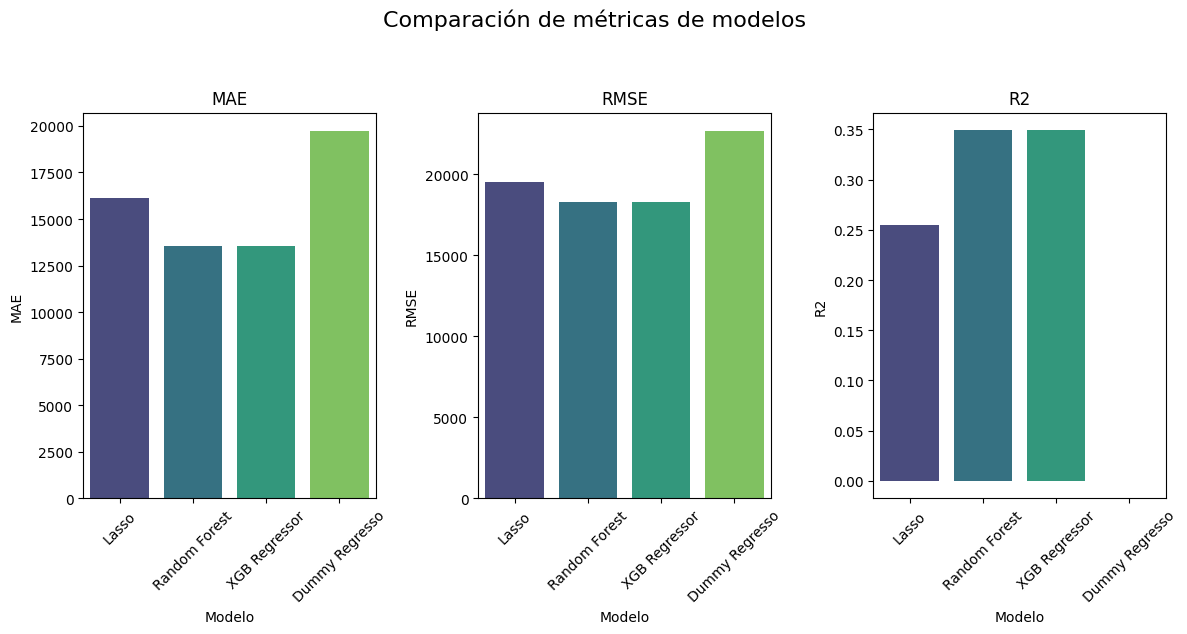

In [45]:
columns_filtered_numeric_continuous_toscale = ['date_year', 'date_month', 'dep_militartime', 'float_time_taken', 'arr_militartime', 'non-stop-name_freq', 'num_code']

df_resultados_metricas, best_params_dict, df_y_pred, fig = Regression_Models(df = df_filtered, 
                                                            column_y = "price", 
                                                            continuous_cols_toscale = columns_filtered_numeric_continuous_toscale, 
                                                            param_grid_lasso = param_grid_lasso, 
                                                            param_grid_rf = param_grid_rf, 
                                                            param_grid_xgb = param_grid_xgb)


In [48]:
df_resultados_metricas

,Modelo,MAE,RMSE,R2
0,Lasso,16127.798244,19561.914369,0.255325
1,Random Forest,13523.777281,18288.764086,0.349103
2,XGB Regressor,13523.777281,18288.764086,0.349103
3,Dummy Regresso,19714.687468,22668.820655,-0.000004


In [49]:
best_params_dict

{'Lasso': {'model__alpha': 0.0001},
 'Random Forest': {'model__max_depth': None,
  'model__min_samples_split': 5,
  'model__n_estimators': 100},
 'XGB Regressor': {'model__colsample_bytree': 0.8,
  'model__learning_rate': 0.1,
  'model__max_depth': 10,
  'model__n_estimators': 100,
  'model__subsample': 1.0}}

In [50]:
df_y_pred

,Lasso,Random Forest,XGB Regressor,Dummy Regresso
0,5833.354169,5889.379333,5889.379333,20892.772696
1,22450.601602,6794.855526,6794.855526,20892.772696
2,24942.504694,16138.678250,16138.678250,20892.772696
3,7672.783746,3685.726294,3685.726294,20892.772696
4,29808.963060,25365.765399,25365.765399,20892.772696
...,...,...,...,...
60047,32495.597206,37413.693045,37413.693045,20892.772696
60048,20264.486342,8719.000000,8719.000000,20892.772696
60049,6716.002643,5102.000000,5102.000000,20892.772696
60050,-876.583947,2268.519714,2268.519714,20892.772696


### Actividad 10

Genera una conclusión final respecto a qué tan útiles son los resultados encontrados para resolver el problema propuesto y define cuáles podrían ser los próximos pasos para el proyecto.

In [47]:
# Al comparar los distintos modelos a través de las distintas métricas se concluye los siguiente:
#   - Los Modelos Lasso, RandomForest y XGBBoost presentan una mejora considerable respecto al Baseline Dummy Regressor
#   - Los mejores modelos con mejores métricas son Random Forest y XGB Regressor
#   - Al guardar los modelos, se evidencia que Random Forest es un modelo más costoso y pesado respecto a los otros dos
#   - Por lo tanto, el mejor modelo resulta ser XGBoost en su relación métrica/costo